<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

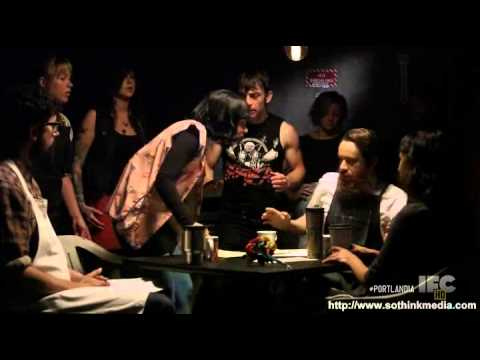

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/alex/code/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [127]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
# Start here 

In [4]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [128]:
shops["full_review_text"].head()

0     11/25/2016 1 check-in Love love loved the atm...
1     12/2/2016 Listed in Date Night: Austin, Ambia...
2     11/30/2016 1 check-in Listed in Brunch Spots ...
3     11/25/2016 Very cool decor! Good drinks Nice ...
4     12/3/2016 1 check-in They are located within ...
Name: full_review_text, dtype: object

In [129]:
shops["full_review_text"].tail()

7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, dtype: object

In [130]:
shops["full_review_text"][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [131]:
shops["cleaned_text"] = shops["full_review_text"].str.replace('\d+'+' check-in', '').str.replace('\d+' + "/" + '\d+' + "/" + '\d+' + " ", '').str.lstrip()#.str.replace('//', '')

In [132]:
shops["cleaned_text"]

0       Love love loved the atmosphere! Every corner o...
1       Listed in Date Night: Austin, Ambiance in Aust...
2       Listed in Brunch Spots I loved the eclectic an...
3       Very cool decor! Good drinks Nice seating  How...
4       They are located within the Northcross mall sh...
                              ...                        
7611    I actually step into this restaurant by chance...
7612    Ok, The Steeping Room IS awesome. How do they ...
7613    Loved coming here for tea, and the atmosphere ...
7614    The food is just average. The booths didn't fe...
7615    I finally stopped in for lunch with my colleag...
Name: cleaned_text, Length: 7616, dtype: object

In [133]:
shops["review_date"] = shops["full_review_text"].str.replace('\d+'+' check-in', '').str.split(" ").str[1]
shops["review_date"]

0       11/25/2016
1        12/2/2016
2       11/30/2016
3       11/25/2016
4        12/3/2016
           ...    
7611     2/19/2015
7612     1/21/2016
7613     4/30/2015
7614      8/2/2015
7615     5/23/2015
Name: review_date, Length: 7616, dtype: object

In [134]:
shops["cleaned_star_rating"] = shops["star_rating"].str.replace(" star rating", "").astype(float)
shops["cleaned_star_rating"]

0       5.0
1       4.0
2       4.0
3       2.0
4       4.0
       ... 
7611    4.0
7612    5.0
7613    4.0
7614    3.0
7615    4.0
Name: cleaned_star_rating, Length: 7616, dtype: float64

In [135]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,cleaned_text,review_date,cleaned_star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Love love loved the atmosphere! Every corner o...,11/25/2016,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Listed in Brunch Spots I loved the eclectic an...,11/30/2016,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating How...,11/25/2016,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,They are located within the Northcross mall sh...,12/3/2016,4.0


In [136]:
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops["cleaned_text"], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [137]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,cleaned_text,review_date,cleaned_star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Love love loved the atmosphere! Every corner o...,11/25/2016,5.0,"[Love, love, loved, the, atmosphere!, Every, c..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0,"[Listed, in, Date, Night:, Austin,, Ambiance, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Listed in Brunch Spots I loved the eclectic an...,11/30/2016,4.0,"[Listed, in, Brunch, Spots, I, loved, the, ecl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating How...,11/25/2016,2.0,"[Very, cool, decor!, Good, drinks, Nice, seati..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,They are located within the Northcross mall sh...,12/3/2016,4.0,"[They, are, located, within, the, Northcross, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [138]:
# Helper function to count tokens, thanks John-Cody
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [139]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,the,6520,27779,1.0,0.035212,0.035212,0.856092
21,and,6804,25748,2.0,0.032638,0.067850,0.893382
6,a,6181,22085,3.0,0.027995,0.095845,0.811581
65,I,5469,19780,4.0,0.025073,0.120918,0.718093
8,to,5631,16904,5.0,0.021427,0.142345,0.739364


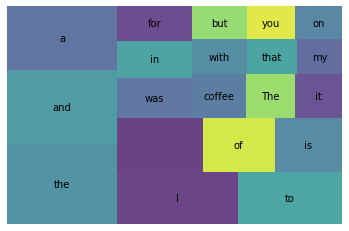

In [140]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [141]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops["cleaned_text"], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens_stopwords_removed'] = tokens

In [142]:
shops[["tokens",'tokens_stopwords_removed']]

,tokens,tokens_stopwords_removed
0,"[Love, love, loved, the, atmosphere!, Every, c...","[love, love, loved, atmosphere!, corner, coffe..."
1,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust..."
2,"[Listed, in, Brunch, Spots, I, loved, the, ecl...","[listed, brunch, spots, loved, eclectic, homey..."
3,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho..."
4,"[They, are, located, within, the, Northcross, ...","[located, northcross, mall, shopping, center, ..."
...,...,...
7611,"[I, actually, step, into, this, restaurant, by...","[actually, step, restaurant, chance, favorites..."
7612,"[Ok,, The, Steeping, Room, IS, awesome., How, ...","[ok,, steeping, room, awesome., great, menu, i..."
7613,"[Loved, coming, here, for, tea,, and, the, atm...","[loved, coming, tea,, atmosphere, pretty, fres..."
7614,"[The, food, is, just, average., The, booths, d...","[food, average., booths, didn't, feel, clean.,..."


In [143]:
wc_stopwords = count(shops['tokens_stopwords_removed'])
wc_stopwords.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,coffee,4210,8058,1.0,0.020888,0.020888,0.552784
156,place,3029,4264,2.0,0.011053,0.031940,0.397715
71,great,2438,3250,3.0,0.008424,0.040365,0.320116
278,it's,2061,3117,4.0,0.008080,0.048445,0.270614
164,like,2034,2902,5.0,0.007522,0.055967,0.267069


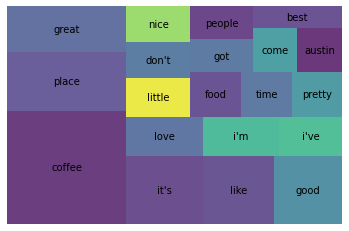

In [144]:
wc_sw = count(shops['tokens_stopwords_removed'])

wc_sw_top20 = wc_sw[wc_sw['rank'] <= 20]

squarify.plot(sizes=wc_sw_top20['pct_total'], label=wc_sw_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [150]:
nlp = spacy.load("en_core_web_lg")

# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_space == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

shops['lemmas'] = shops['cleaned_text'].apply(get_lemmas)

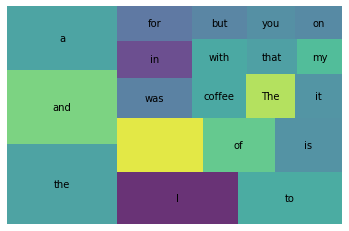

In [151]:
wc_lemma = count(shops['lemmas'])
wc_lemma_top20 = wc_lemma[wc_lemma['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [300]:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee","come","nice","good","great","like","love","try",'place', "it's", "i'm", "i've", "it's",'austin', "it.","s","that's","austin ", "here.","there's","place."])

In [301]:
tokens = []

for doc in tokenizer.pipe(shops["cleaned_text"], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_space == False):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens_custom_stop_words'] = tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,cleaned_text,review_date,cleaned_star_rating,tokens,tokens_stopwords_removed,lemmas,tokens_custom_stop_words,lemmas_custom,rating_label,lemmas_custom_string
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Love love loved the atmosphere! Every corner o...,11/25/2016,5.0,"[Love, love, loved, the, atmosphere!, Every, c...","[love, love, loved, atmosphere!, corner, coffe...","[love, love, love, atmosphere, corner, coffee,...","[loved, atmosphere!, corner, shop, style,, swi...","[love, atmosphere, corner, shop, style, swing,...",Good,"love, love, love, atmosphere, corner, shop, st..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ...","[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Ambiance, beautiful, ambia...",Good,"list, Date, Night, Ambiance, beautiful, love, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Listed in Brunch Spots I loved the eclectic an...,11/30/2016,4.0,"[Listed, in, Brunch, Spots, I, loved, the, ecl...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...",Good,"list, Brunch, Spots, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating How...,11/25/2016,2.0,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over...","[cool, decor!, drinks, seating, however..., ov...","[cool, decor, drink, nice, seating, overpriced...",Bad,"cool, decor, good, drink, nice, seating, overp..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,They are located within the Northcross mall sh...,12/3/2016,4.0,"[They, are, located, within, the, Northcross, ...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...",Good,"locate, Northcross, mall, shopping, center, fa..."


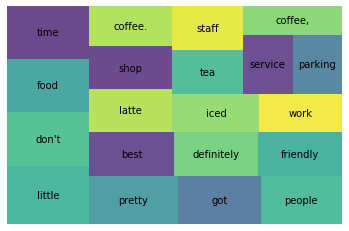

In [302]:
wc_sw_custom = count(shops['tokens_custom_stop_words'])

wc_sw_custom_top20 = wc_sw_custom[wc_sw_custom['rank'] <= 20]

squarify.plot(sizes=wc_sw_custom_top20['pct_total'], label=wc_sw_custom_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [303]:
nlp = spacy.load("en_core_web_lg")

# Wrap it all in a function
def get_lemmas_custom(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_space == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

shops['lemmas_custom'] = shops['cleaned_text'].apply(get_lemmas_custom)
shops.head()

,coffee_shop_name,full_review_text,star_rating,cleaned_text,review_date,cleaned_star_rating,tokens,tokens_stopwords_removed,lemmas,tokens_custom_stop_words,lemmas_custom,rating_label,lemmas_custom_string
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Love love loved the atmosphere! Every corner o...,11/25/2016,5.0,"[Love, love, loved, the, atmosphere!, Every, c...","[love, love, loved, atmosphere!, corner, coffe...","[love, love, love, atmosphere, corner, coffee,...","[loved, atmosphere!, corner, shop, style,, swi...","[love, atmosphere, corner, shop, style, swing,...",Good,"love, love, love, atmosphere, corner, shop, st..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ...","[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Ambiance, beautiful, ambia...",Good,"list, Date, Night, Ambiance, beautiful, love, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Listed in Brunch Spots I loved the eclectic an...,11/30/2016,4.0,"[Listed, in, Brunch, Spots, I, loved, the, ecl...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...",Good,"list, Brunch, Spots, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating How...,11/25/2016,2.0,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over...","[cool, decor!, drinks, seating, however..., ov...","[cool, decor, drink, seating, overpriced, $, 1...",Bad,"cool, decor, good, drink, nice, seating, overp..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,They are located within the Northcross mall sh...,12/3/2016,4.0,"[They, are, located, within, the, Northcross, ...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...",Good,"locate, Northcross, mall, shopping, center, fa..."


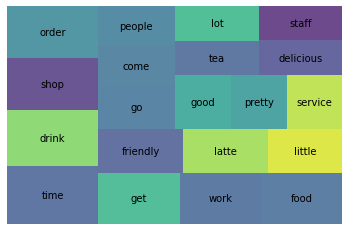

In [304]:
wc_lemmas_custom = count(shops['lemmas_custom'])
wc_lemmas_custom_top20 = wc_lemmas_custom[wc_lemmas_custom['rank'] <= 20]

squarify.plot(sizes=wc_lemmas_custom_top20['pct_total'], label=wc_lemmas_custom_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [305]:
shops['cleaned_star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: cleaned_star_rating, dtype: int64

In [306]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,cleaned_text,review_date,cleaned_star_rating,tokens,tokens_stopwords_removed,lemmas,tokens_custom_stop_words,lemmas_custom,rating_label,lemmas_custom_string
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Love love loved the atmosphere! Every corner o...,11/25/2016,5.0,"[Love, love, loved, the, atmosphere!, Every, c...","[love, love, loved, atmosphere!, corner, coffe...","[love, love, love, atmosphere, corner, coffee,...","[loved, atmosphere!, corner, shop, style,, swi...","[love, atmosphere, corner, shop, style, swing,...",Good,"love, love, love, atmosphere, corner, shop, st..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ...","[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Ambiance, beautiful, ambia...",Good,"list, Date, Night, Ambiance, beautiful, love, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Listed in Brunch Spots I loved the eclectic an...,11/30/2016,4.0,"[Listed, in, Brunch, Spots, I, loved, the, ecl...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...",Good,"list, Brunch, Spots, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating How...,11/25/2016,2.0,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over...","[cool, decor!, drinks, seating, however..., ov...","[cool, decor, drink, seating, overpriced, $, 1...",Bad,"cool, decor, good, drink, nice, seating, overp..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,They are located within the Northcross mall sh...,12/3/2016,4.0,"[They, are, located, within, the, Northcross, ...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...",Good,"locate, Northcross, mall, shopping, center, fa..."


Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.

In [307]:
def good_bad_label(cellcontents):
    if cellcontents >= 4:
        return "Good"
    else:
        return "Bad"

shops["rating_label"] = shops['cleaned_star_rating'].apply(good_bad_label)

shops.head()

,coffee_shop_name,full_review_text,star_rating,cleaned_text,review_date,cleaned_star_rating,tokens,tokens_stopwords_removed,lemmas,tokens_custom_stop_words,lemmas_custom,rating_label,lemmas_custom_string
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Love love loved the atmosphere! Every corner o...,11/25/2016,5.0,"[Love, love, loved, the, atmosphere!, Every, c...","[love, love, loved, atmosphere!, corner, coffe...","[love, love, love, atmosphere, corner, coffee,...","[loved, atmosphere!, corner, shop, style,, swi...","[love, atmosphere, corner, shop, style, swing,...",Good,"love, love, love, atmosphere, corner, shop, st..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ...","[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Ambiance, beautiful, ambia...",Good,"list, Date, Night, Ambiance, beautiful, love, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Listed in Brunch Spots I loved the eclectic an...,11/30/2016,4.0,"[Listed, in, Brunch, Spots, I, loved, the, ecl...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...",Good,"list, Brunch, Spots, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating How...,11/25/2016,2.0,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over...","[cool, decor!, drinks, seating, however..., ov...","[cool, decor, drink, seating, overpriced, $, 1...",Bad,"cool, decor, good, drink, nice, seating, overp..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,They are located within the Northcross mall sh...,12/3/2016,4.0,"[They, are, located, within, the, Northcross, ...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...",Good,"locate, Northcross, mall, shopping, center, fa..."


In [308]:
#shops["lemmas_custom_string"] = shops.lemmas_custom.apply(lambda x: ', '.join([str(i) for i in x]))
shops.head()

,coffee_shop_name,full_review_text,star_rating,cleaned_text,review_date,cleaned_star_rating,tokens,tokens_stopwords_removed,lemmas,tokens_custom_stop_words,lemmas_custom,rating_label,lemmas_custom_string
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Love love loved the atmosphere! Every corner o...,11/25/2016,5.0,"[Love, love, loved, the, atmosphere!, Every, c...","[love, love, loved, atmosphere!, corner, coffe...","[love, love, love, atmosphere, corner, coffee,...","[loved, atmosphere!, corner, shop, style,, swi...","[love, atmosphere, corner, shop, style, swing,...",Good,"love, love, love, atmosphere, corner, shop, st..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ...","[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Ambiance, beautiful, ambia...",Good,"list, Date, Night, Ambiance, beautiful, love, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Listed in Brunch Spots I loved the eclectic an...,11/30/2016,4.0,"[Listed, in, Brunch, Spots, I, loved, the, ecl...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...","[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p...",Good,"list, Brunch, Spots, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating How...,11/25/2016,2.0,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over...","[cool, decor!, drinks, seating, however..., ov...","[cool, decor, drink, seating, overpriced, $, 1...",Bad,"cool, decor, good, drink, nice, seating, overp..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,They are located within the Northcross mall sh...,12/3/2016,4.0,"[They, are, located, within, the, Northcross, ...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...","[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f...",Good,"locate, Northcross, mall, shopping, center, fa..."


In [309]:
good_lemmas_custom = shops[shops["rating_label"] == "Good"]["lemmas_custom"]
good_lemmas_custom

0       [love, atmosphere, corner, shop, style, swing,...
1       [list, Date, Night, Ambiance, beautiful, ambia...
2       [list, Brunch, Spots, love, eclectic, homey, p...
4       [locate, Northcross, mall, shopping, center, f...
5       [cute, cafe, think, moment, step, find, cute, ...
                              ...                        
7610    [food, meal, enjoy, clean, people, dietary, re...
7611    [actually, step, restaurant, chance, favorite,...
7612    [ok, Steeping, Room, awesome, menu, item, cour...
7613    [love, come, tea, atmosphere, pretty, fresh, o...
7615    [finally, stop, lunch, colleague, glad, delici...
Name: lemmas_custom, Length: 6140, dtype: object

In [310]:
list_of_good_lc = []

for glc in good_lemmas_custom:
    for lem in glc:
        list_of_good_lc.append(lem)
counts_of_good_lc = Counter(list_of_good_lc)


In [311]:
bad_lemmas_custom = shops[shops["rating_label"] == "Bad"]["lemmas_custom"]
list_of_bad_lc = []

for blc in bad_lemmas_custom:
    for lem in blc:
        list_of_bad_lc.append(lem)
counts_of_bad_lc = Counter(list_of_bad_lc)

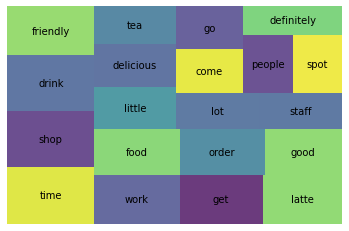

In [312]:
wc_lemma_custom_good = count(shops[shops["rating_label"] == "Good"]['lemmas_custom'])
wc_lemma_custom_good_top20 = wc_lemma_custom_good[wc_lemma_custom_good['rank'] <= 20]

squarify.plot(sizes=wc_lemma_custom_good_top20['pct_total'], label=wc_lemma_custom_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

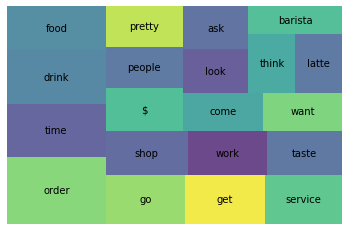

In [313]:
wc_lemma_custom_bad = count(shops[shops["rating_label"] == "Bad"]['lemmas_custom'])
wc_lemma_custom_bad_top20 = wc_lemma_custom_bad[wc_lemma_custom_bad['rank'] <= 20]

squarify.plot(sizes=wc_lemma_custom_bad_top20['pct_total'], label=wc_lemma_custom_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [314]:
wc_lemma_custom_bad

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,order,430,759,1.0,0.010655,0.010655,0.291328
224,time,423,612,2.0,0.008591,0.019246,0.286585
21,drink,364,610,3.0,0.008563,0.027809,0.246612
130,food,321,499,4.0,0.007005,0.034814,0.217480
40,go,338,450,5.0,0.006317,0.041131,0.228997
...,...,...,...,...,...,...,...
7534,atop,1,1,7534.0,0.000014,0.999944,0.000678
7531,dull,1,1,7535.0,0.000014,0.999958,0.000678
7533,tasted,1,1,7536.0,0.000014,0.999972,0.000678
7529,imo,1,1,7537.0,0.000014,0.999986,0.000678


In [315]:
wc_lemma_custom_good

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
389,time,1341,1771,1.0,0.007145,0.007145,0.218404
35,shop,1318,1759,2.0,0.007097,0.014242,0.214658
23,drink,1277,1733,3.0,0.006992,0.021234,0.207980
149,friendly,1440,1515,4.0,0.006112,0.027346,0.234528
493,work,1182,1497,5.0,0.006040,0.033385,0.192508
...,...,...,...,...,...,...,...
14665,windowed,1,1,14668.0,0.000004,0.999984,0.000163
14667,actuality,1,1,14669.0,0.000004,0.999988,0.000163
14668,crass,1,1,14670.0,0.000004,0.999992,0.000163
14670,digestion,1,1,14671.0,0.000004,0.999996,0.000163


In [316]:
good_lemma_counts = wc_lemma_custom_good[["word","count"]]
good_lemma_counts

,word,count
389,time,1771
35,shop,1759
23,drink,1733
149,friendly,1515
493,work,1497
...,...,...
14665,windowed,1
14667,actuality,1
14668,crass,1
14670,digestion,1


In [317]:
bad_lemma_counts = wc_lemma_custom_bad[["word","count"]]
bad_lemma_counts

,word,count
35,order,759
224,time,612
21,drink,610
130,food,499
40,go,450
...,...,...
7534,atop,1
7531,dull,1
7533,tasted,1
7529,imo,1


In [318]:
word_count_differences_good_bad = good_lemma_counts.merge(bad_lemma_counts, on="word", how="inner", suffixes=("Good","Bad"))
word_count_differences_good_bad

,word,countGood,countBad
0,time,1771,612
1,shop,1759,425
2,drink,1733,610
3,friendly,1515,209
4,work,1497,407
...,...,...,...
5458,sequence,1,3
5459,celiac,1,1
5460,latke,1,2
5461,seated,1,1


In [319]:
import numpy as np

In [320]:
word_count_differences_good_bad["Absolute_difference_between_Good_Bad"] = np.abs(word_count_differences_good_bad["countGood"] - word_count_differences_good_bad["countBad"])
word_count_differences_good_bad

,word,countGood,countBad,Absolute_difference_between_Good_Bad
0,time,1771,612,1159
1,shop,1759,425,1334
2,drink,1733,610,1123
3,friendly,1515,209,1306
4,work,1497,407,1090
...,...,...,...,...
5458,sequence,1,3,2
5459,celiac,1,1,0
5460,latke,1,2,1
5461,seated,1,1,0


In [321]:
sorted_counts = word_count_differences_good_bad.sort_values("Absolute_difference_between_Good_Bad", ascending=False)[:10]

In [322]:
sorted_counts

,word,countGood,countBad,Absolute_difference_between_Good_Bad
1,shop,1759,425,1334
3,friendly,1515,209,1306
0,time,1771,612,1159
11,delicious,1233,86,1147
9,good,1252,124,1128
2,drink,1733,610,1123
4,work,1497,407,1090
6,latte,1395,318,1077
5,get,1460,447,1013
10,little,1242,254,988


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


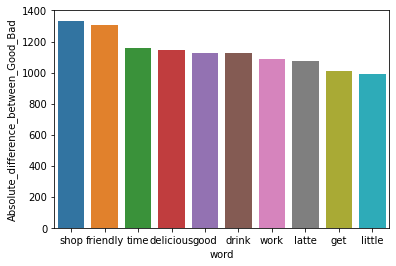

In [323]:
sns.barplot(x="word",y='Absolute_difference_between_Good_Bad', data=sorted_counts)

In [339]:
shops["dayofweek"] = pd.to_datetime(shops["review_date"]).dt.dayofweek
shops["month"] = pd.to_datetime(shops["review_date"]).dt.month
shops["year"] = pd.to_datetime(shops["review_date"]).dt.year

In [340]:
shops[["dayofweek","cleaned_star_rating"]].corr()

,dayofweek,cleaned_star_rating
dayofweek,1.000000,-0.022987
cleaned_star_rating,-0.022987,1.000000


In [341]:
shops[["month","cleaned_star_rating"]].corr()

,month,cleaned_star_rating
month,1.000000,-0.000787
cleaned_star_rating,-0.000787,1.000000


In [342]:
shops[["year","cleaned_star_rating"]].corr()

,year,cleaned_star_rating
year,1.000000,-0.007013
cleaned_star_rating,-0.007013,1.000000


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

